## Import

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import scipy.stats
import os

## 데이터 불러오기 & 합치기

In [2]:
path = os.getcwd()+'/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_데이터_210803'

In [3]:
taja_2018 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv',encoding = 'cp949' )
taja_2019 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv',encoding = 'cp949' )
taja_2020 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv',encoding = 'cp949' )
taja_2021 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv',encoding = 'cp949' )

In [4]:
seonsu_2018 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv',encoding = 'cp949' )
seonsu_2019 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv',encoding = 'cp949' )
seonsu_2020 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv',encoding = 'cp949' )
seonsu_2021 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv',encoding = 'cp949' )

In [5]:
hts_2018 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv',encoding = 'cp949' )
hts_2019 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv',encoding = 'cp949' )
hts_2020 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv',encoding = 'cp949' )
hts_2021 = pd.read_csv(path+'/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv',encoding = 'cp949' )

In [6]:
taja_seonsu_2018 = pd.merge(taja_2018, seonsu_2018, left_on=['PCODE','GYEAR'], right_on=['PCODE','GYEAR'], how='left')
taja_seonsu_2019 = pd.merge(taja_2019, seonsu_2019, left_on=['PCODE','GYEAR'], right_on=['PCODE','GYEAR'], how='left')
taja_seonsu_2020 = pd.merge(taja_2020, seonsu_2020, left_on=['PCODE','GYEAR'], right_on=['PCODE','GYEAR'], how='left')
taja_seonsu_2021 = pd.merge(taja_2021, seonsu_2021, left_on=['PCODE','GYEAR'], right_on=['PCODE','GYEAR'], how='left')

In [7]:
taja_seonsu_hts_2018 = pd.merge(hts_2018, taja_seonsu_2018, left_on=['PCODE','GYEAR','T_ID'], right_on=['PCODE','GYEAR','T_ID'], how='left')
taja_seonsu_hts_2019 = pd.merge(hts_2019, taja_seonsu_2019, left_on=['PCODE','GYEAR','T_ID'], right_on=['PCODE','GYEAR','T_ID'], how='left')
taja_seonsu_hts_2020 = pd.merge(hts_2020, taja_seonsu_2020, left_on=['PCODE','GYEAR','T_ID'], right_on=['PCODE','GYEAR','T_ID'], how='left')
taja_seonsu_hts_2021 = pd.merge(hts_2021, taja_seonsu_2021, left_on=['PCODE','GYEAR','T_ID'], right_on=['PCODE','GYEAR','T_ID'], how='left')

In [8]:
taja_seonsu_hts = pd.concat([taja_seonsu_hts_2018, taja_seonsu_hts_2019, taja_seonsu_hts_2020, taja_seonsu_hts_2021])

## 타구별 고유값 생성

In [9]:
taja_seonsu_hts['PIT_KEY'] = taja_seonsu_hts['G_ID'] + taja_seonsu_hts['PIT_ID']

## 출루율 생성

In [10]:
taja_seonsu_hts['OBP'] = (taja_seonsu_hts['HIT'] + taja_seonsu_hts['BB'] + taja_seonsu_hts['HP']) / (taja_seonsu_hts['AB'] + taja_seonsu_hts['BB'] + taja_seonsu_hts['HP'] + taja_seonsu_hts['SF'])

## 최소 타석 미충족 타자 제거

In [11]:
taja_seonsu_hts = taja_seonsu_hts[taja_seonsu_hts['PA']>=100]
taja_seonsu_hts = taja_seonsu_hts.reset_index(drop=True)

## 같은 종류의 타구끼리 합치기

In [12]:
# 합치기 전의 타구 종류
list(taja_seonsu_hts['HIT_RESULT'].unique())

['플라이',
 '1루타',
 '번트안타',
 '땅볼아웃',
 '2루타',
 '파울플라이',
 '3루타',
 '직선타',
 '희생번트',
 '홈런',
 '내야안타(1루타)',
 '희생플라이',
 '병살타',
 '인필드플라이',
 '번트아웃',
 '야수선택',
 '삼중살타']

In [13]:
def HIT_RESULT_CHANGE(df):
    
    bound = ['땅볼아웃', '내야안타(1루타)', '번트아웃', '번트안타', '병살타', '삼중살타', '야수선택', '희생번트']
    fly = ['파울플라이', '희생플라이', '인필드플라이', '플라이']
    drive = ['직선타']
    one = ['1루타']
    two = ['2루타']
    three = ['3루타']
    homerun = ['홈런']
        
    for i in range(len(df)):
        
        if df['HIT_RESULT'].loc[i] in bound:
            df['HIT_RESULT'].loc[i] = 'bound'
        elif df['HIT_RESULT'].loc[i] in fly:
            df['HIT_RESULT'].loc[i] = 'fly'
        elif df['HIT_RESULT'].loc[i] in drive:
            df['HIT_RESULT'].loc[i] = 'drive'
        elif df['HIT_RESULT'].loc[i] in one:
            df['HIT_RESULT'].loc[i] = 'one'
        elif df['HIT_RESULT'].loc[i] in two:
            df['HIT_RESULT'].loc[i] = 'two'
        elif df['HIT_RESULT'].loc[i] in three:
            df['HIT_RESULT'].loc[i] = 'three'
        elif df['HIT_RESULT'].loc[i] in homerun:
            df['HIT_RESULT'].loc[i] = 'homerun'

In [14]:
HIT_RESULT_CHANGE(taja_seonsu_hts)

C:\Users\Seonggon Kim\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
# 합친 후의 타구 종류
list(taja_seonsu_hts['HIT_RESULT'].unique())

['fly', 'one', 'bound', 'two', 'three', 'drive', 'homerun']

## 구장 변수 생성

##  
## =================================================================
## 기존의 KBO 배럴 기준
## =================================================================

## 기존의 KBO 배럴 타구 생성

In [16]:
# 155km/h 이상 22.5도 이상 35도 이하 / 160km/h 이상 20도 이상 37.5도 이하 / 165km/h 이상 17.5도 이상 40도 이하

In [17]:
def BARREL_KBO(df):
    df['BARREL_KBO'] = 0   
        
    for i in range(len(df)):
        if ((df['HIT_VEL'].loc[i]>=155) & (df['HIT_VEL'].loc[i]<=160) & (df['HIT_ANG_VER'].loc[i]<=35) & (df['HIT_ANG_VER'].loc[i]>=22.5)):
            df['BARREL_KBO'].loc[i]=1
        elif ((df['HIT_VEL'].loc[i]>=160) & (df['HIT_VEL'].loc[i]<=165) & (df['HIT_ANG_VER'].loc[i]<=37.5) & (df['HIT_ANG_VER'].loc[i]>=20)):
            df['BARREL_KBO'].loc[i]=1
        elif ((df['HIT_VEL'].loc[i]>=165) & (df['HIT_ANG_VER'].loc[i]<=40) & (df['HIT_ANG_VER'].loc[i]>=17.5)):
            df['BARREL_KBO'].loc[i]=1
        else:
            df['BARREL_KBO'].loc[i]=0

In [18]:
BARREL_KBO(taja_seonsu_hts)

In [19]:
BARREL_KBO_CNT = pd.DataFrame(taja_seonsu_hts[taja_seonsu_hts['BARREL_KBO']==1].groupby(['PCODE', 'GYEAR'])['BARREL_KBO'].count())
BARREL_KBO_CNT = BARREL_KBO_CNT.reset_index()
BARREL_KBO_CNT.columns = ['PCODE', 'GYEAR', 'BARREL_KBO_CNT']

In [20]:
taja_seonsu_hts = pd.merge(taja_seonsu_hts, BARREL_KBO_CNT, left_on=['PCODE', 'GYEAR'], right_on=['PCODE', 'GYEAR'], how='left')
taja_seonsu_hts.fillna(0, inplace = True)

## 기존의 KBO 배럴 타구의 개수

In [21]:
taja_seonsu_hts[taja_seonsu_hts['BARREL_KBO']==1].groupby('GYEAR').size()

GYEAR
2018    946
2019    621
2020    723
2021    312
dtype: int64

In [22]:
# 배럴이 아닌 타구에서 생산된 홈런이 배럴인 타구에서 생산된 홈런보다 더 많음
taja_seonsu_hts[taja_seonsu_hts['HIT_RESULT']=='homerun'].groupby('BARREL_KBO').size()

BARREL_KBO
0    2535
1    1993
dtype: int64

## 각 타자의 데이터를 연도별로 정리

In [23]:
taja_seonsu_hts.fillna('0', inplace = True)
taja_seonsu_hts = taja_seonsu_hts.drop_duplicates(['NAME', 'GYEAR'], keep = 'first')
taja_seonsu_hts = taja_seonsu_hts.sort_values(['PCODE','GYEAR'], ascending=False)
taja_seonsu_hts = taja_seonsu_hts.reset_index(drop=True)

## 기존의 KBO 배럴 타구와 타겟변수 사이의 상관계수

(0.7124223041800712, 1.4239244654710009e-87)

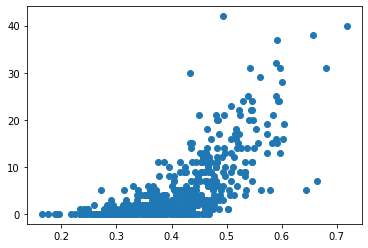

In [24]:
# 기존의 KBO 배럴 타구와 장타율 사이의 상관계수는 0.712임
# 이는 본팀이 새롭게 정의한 홈런성 배럴 타구와 장타율 사이의 상관계수보다 낮음
plt.scatter(taja_seonsu_hts['SLG'], taja_seonsu_hts['BARREL_KBO_CNT'])
scipy.stats.pearsonr(taja_seonsu_hts['SLG'], taja_seonsu_hts['BARREL_KBO_CNT'])

(0.39150519414017637, 6.989822203495665e-22)

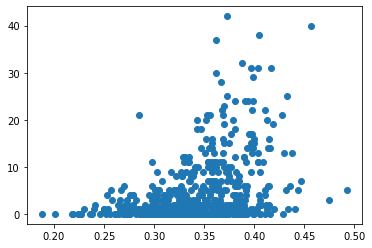

In [25]:
# 기존의 KBO 배럴 타구와 출루율 사이의 상관계수는 0.392임
# 이는 본팀이 새롭게 정의한 안타성 배럴 타구와 출루율 사이의 상관계수보다 낮음
plt.scatter(taja_seonsu_hts['OBP'], taja_seonsu_hts['BARREL_KBO_CNT'])
scipy.stats.pearsonr(taja_seonsu_hts['OBP'], taja_seonsu_hts['BARREL_KBO_CNT'])

## 2019년 박병호, 로맥, 최정의 홈런 수와 기존의 KBO 기준 배럴 타구 수

In [26]:
# 박병호, 로맥, 최정은 홈런 개수 기준 상위 3명의 선수임
taja_seonsu_hts[(taja_seonsu_hts['NAME'].isin(['박병호', '로맥', '최정'])) & (taja_seonsu_hts['GYEAR']==2019)].loc[:,['GYEAR','NAME','HR','BARREL_KBO_CNT']]

,GYEAR,NAME,HR,BARREL_KBO_CNT
145,2019,최정,29.0,14.0
164,2019,박병호,33.0,29.0
285,2019,로맥,29.0,23.0
